# Evolution de la concentration atmosphérique en CO<sub>2</sub>

Import des packages Python utiles à cette analyse:

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
from sklearn.linear_model import LinearRegression
import numpy as np
from urllib.request import urlretrieve

On récupère les données hebdomadaires de concentration sur le [site de l'institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo.html). Ces mesures sont effectuées à l'observatoire Mauna Loa, situé à Hawaii. Date de téléchargement des données utilisées pour cette analyse: **26 juin 2020**. 

In [98]:
data_url = 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv'
file_name = os.path.split(data_url)[1]
if not os.path.exists(file_name):
    urlretrieve(data_url, file_name)

On lit le fichier CSV téléchargé, il contient 44 lignes d'en-tête que nous ignorons. On attribue les libellés 'date' et 'CO2' aux colonnes de date (au format AAAA-MM-JJ) et concentration en CO<sub>2</sub> ([en ppm](https://fr.wikipedia.org/wiki/Partie_par_million)) des données mesurées.

In [99]:
raw_data = pd.read_csv(file_name, skiprows=44, names=['date', 'CO2'])
raw_data

date     CO2
0     1958-03-29  316.19
1     1958-04-05  317.31
2     1958-04-12  317.69
3     1958-04-19  317.58
4     1958-04-26  316.48
5     1958-05-03  316.95
6     1958-05-17  317.56
7     1958-05-24  317.99
8     1958-07-05  315.85
9     1958-07-12  315.85
10    1958-07-19  315.46
11    1958-07-26  315.59
12    1958-08-02  315.64
13    1958-08-09  315.10
14    1958-08-16  315.09
15    1958-08-30  314.14
16    1958-09-06  313.54
17    1958-11-08  313.05
18    1958-11-15  313.26
19    1958-11-22  313.57
20    1958-11-29  314.01
21    1958-12-06  314.56
22    1958-12-13  314.41
23    1958-12-20  314.77
24    1958-12-27  315.21
25    1959-01-03  315.24
26    1959-01-10  315.50
27    1959-01-17  315.69
28    1959-01-24  315.86
29    1959-01-31  315.42
...          ...     ...
3143  2019-11-02  409.86
3144  2019-11-09  410.15
3145  2019-11-16  410.22
3146  2019-11-23  410.48
3147  2019-11-30  410.92
3148  2019-12-07  411.27
3149  2019-12-14  411.67
3150  2019-12-21  412.30
3151  2019-12-28  412.59
3152  2020-01-04  413.19
3153  2020-01-11  413.39
3154  2020-01-25  413.36
3155  2020-02-01  413.99
3156  2020-02-08  414.83
3157  2020-02-15  413.81
3158  2020-02-22  414.17
3159  2020-02-29  413.89
3160  2020-03-07  414.00
3161  2020-03-14  414.30
3162  2020-03-21  414.62
3163  2020-03-28  415.57
3164  2020-04-04  415.61
3165  2020-04-11  416.47
3166  2020-04-18  416.60
3167  2020-04-25  415.86
3168  2020-05-02  417.20
3169  2020-05-09  416.99
3170  2020-05-16  416.54
3171  2020-05-23  417.49
3172  2020-05-30  417.19

[3173 rows x 2 columns]

Il y a 3173 relevées de concentration. On vérifie que la concentration est renseignée pour chaque date indiquée:

In [100]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [date, CO2]
Index: []

## Analyse des concentrations observées

Afin de les manipuler plus facilement, on convertit les dates de mesure en objet Python *datetime* associé:

In [101]:
data = raw_data.copy()
data['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in data['date']]

On définit à présent la date comme nouvel index de notre jeu de données. Et on trie par ordre chronologique:

In [102]:
sorted_data = data.set_index('date').sort_index()
sorted_data

CO2
date              
1958-03-29  316.19
1958-04-05  317.31
1958-04-12  317.69
1958-04-19  317.58
1958-04-26  316.48
1958-05-03  316.95
1958-05-17  317.56
1958-05-24  317.99
1958-07-05  315.85
1958-07-12  315.85
1958-07-19  315.46
1958-07-26  315.59
1958-08-02  315.64
1958-08-09  315.10
1958-08-16  315.09
1958-08-30  314.14
1958-09-06  313.54
1958-11-08  313.05
1958-11-15  313.26
1958-11-22  313.57
1958-11-29  314.01
1958-12-06  314.56
1958-12-13  314.41
1958-12-20  314.77
1958-12-27  315.21
1959-01-03  315.24
1959-01-10  315.50
1959-01-17  315.69
1959-01-24  315.86
1959-01-31  315.42
...            ...
2019-11-02  409.86
2019-11-09  410.15
2019-11-16  410.22
2019-11-23  410.48
2019-11-30  410.92
2019-12-07  411.27
2019-12-14  411.67
2019-12-21  412.30
2019-12-28  412.59
2020-01-04  413.19
2020-01-11  413.39
2020-01-25  413.36
2020-02-01  413.99
2020-02-08  414.83
2020-02-15  413.81
2020-02-22  414.17
2020-02-29  413.89
2020-03-07  414.00
2020-03-14  414.30
2020-03-21  414.62
2020-03-28  415.57
2020-04-04  415.61
2020-04-11  416.47
2020-04-18  416.60
2020-04-25  415.86
2020-05-02  417.20
2020-05-09  416.99
2020-05-16  416.54
2020-05-23  417.49
2020-05-30  417.19

[3173 rows x 1 columns]

Le premier relevé date du 29 mars 1958 pour une concentration en CO<sub>2</sub> égale à 316.19 ppm, le dernier du 30 mai 2020 pour une concentration de 417.19 ppm.

Nous vérifons la régularité des mesures en affichant les périodes où il n'y a pas eu de mesures pendant plus d'une semaine:

In [103]:
dates = sorted_data.index
for d1, d2 in zip(dates[:-1], dates[1:]):
    delta = d2-d1
    if  delta > datetime.timedelta(weeks=1):
        print('No concentration measure are given for %d weeks between %s and %s' % (int(delta.days / 7), d1, d2))

No concentration measure are given for 2 weeks between 1958-05-03 and 1958-05-17
No concentration measure are given for 6 weeks between 1958-05-24 and 1958-07-05
No concentration measure are given for 2 weeks between 1958-08-16 and 1958-08-30
No concentration measure are given for 9 weeks between 1958-09-06 and 1958-11-08
No concentration measure are given for 2 weeks between 1959-01-31 and 1959-02-14
No concentration measure are given for 2 weeks between 1959-03-07 and 1959-03-21
No concentration measure are given for 2 weeks between 1959-05-23 and 1959-06-06
No concentration measure are given for 2 weeks between 1959-08-08 and 1959-08-22
No concentration measure are given for 4 weeks between 1962-08-18 and 1962-09-15
No concentration measure are given for 2 weeks between 1962-12-22 and 1963-01-05
No concentration measure are given for 2 weeks between 1963-02-09 and 1963-02-23
No concentration measure are given for 2 weeks between 1963-04-27 and 1963-05-11
No concentration measure are

On note que juste quelques dizaines de mesures hebdomadaires n'ont pas été effectuées sur plus de 3000 mesures. L'écart maximal entre deux mesures de concentration est de 19 semaines. 

Traçons la concentration au fil du temps pour visualiser son évolution:

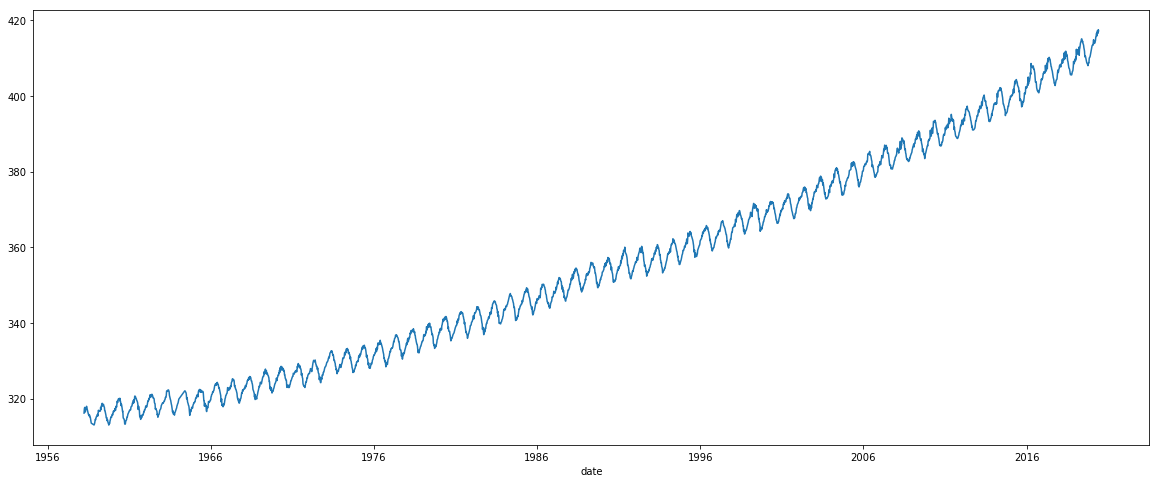

In [104]:
plt.figure(figsize=(20,8))
sorted_data['CO2'].plot()

On observe que la concentration atmosphérique en CO<sub>2</sub> a une tendance croissante au fil du temps avec des oscillations périodique de haute fréquence. Entre 1958 et 2020, elle a augmenté de : 

In [105]:
100 * (sorted_data.iloc[-1]['CO2'] - sorted_data.iloc[0]['CO2']) / sorted_data.iloc[0]['CO2']

31.942819190992758

... 32 % !

Pour caractériser la période des oscillations de concentration, on trace uniquement les 150 dernières concentrations relevées: 

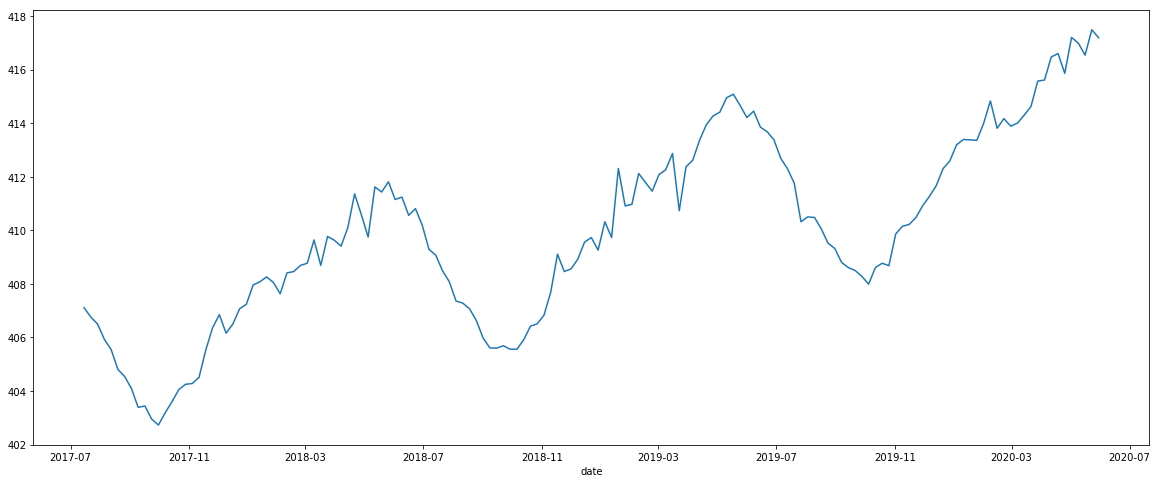

In [106]:
plt.figure(figsize=(20,8))
sorted_data[-150:]['CO2'].plot()

On s'apercoit que les oscillations ont une période d'environ un an. Au cours d'une année donnée, la concentration en CO<sub>2</sub> à Hawaii augmente de janvier à juillet atteignant alors son maximum. Elle décroît ensuite jusqu'en octobre avant d'augmenter à nouveau sur les deux derniers mois de l'année.

Ces fluctuations intra-annuelles sont principalement dues aux plantes et en particulier à leurs activités de photosynthèse qui transforme le CO<sub>2</sub> et l'eau de l'atmosphère en énergie et dioxygène ([source](https://archive.epa.gov/climatechange/kids/documents/carbon-through-the-seasons.pdf)). Cette activité est d'autant plus intense les mois les plus chauds de l'année. 

##  Estimation des concentrations à venir

Dans cette section, on cherche à construire un modèle simple permettant d'estimer la concentration en CO<sub>2</sub> pour les années à venir. D'après le tracé de la concentration entre 1958 et 2020, la concentration $c$ évolue grossièrement de manière parabolique en fonction du temps $t$. 

Nous proposons donc un modèle de la forme: $c = a * t^2  + b * t + c$, où $a$, $b$ et $c$ sont trois paramètres réels. Ces paramètres sont estimés par régression linéaire qui est implémentée dans le package *scikit-learn* ([voir la documentation ici](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)). 

Pour réaliser cette régression, il faut convertir au préalable chaque date en valeur numérique. Par souci de simplicité, on fait le choix d'utiliser l’[ordinal grégorien proleptique](https://docs.python.org/fr/3.6/library/datetime.html#datetime.date.toordinal) de chaque date. Dans cette représentation, le 1er janvier de l’an 1 a pour ordinal 1. Puis on place ces dates ainsi que leurs carrés dans une matrice désignée par la variable $X$.

In [107]:
t = [date.toordinal() for date in sorted_data.index]
def transform_input(t):
    X = np.reshape(t, newshape=(-1, 1))
    X = np.concatenate([X**2, X], axis=1)
    return X  # [nb_observations, 2]
X = transform_input(t)
c = sorted_data['CO2']

reg = LinearRegression().fit(X, c)

Nous obtenons comme valeurs pour les coefficients du modèle: 

In [108]:
a, b, c = reg.coef_[0], reg.coef_[1], reg.intercept_
print('a = %.10f, b = %f, c=%f' % (a, b, c))

a = 0.0000000984, b = -0.138544, c=49090.510420


Afin de juger la qualité du modèle obtenu, nous traçons les concentrations calculées par notre modèle (en orange) et superposons les concentrations observées (en bleu).

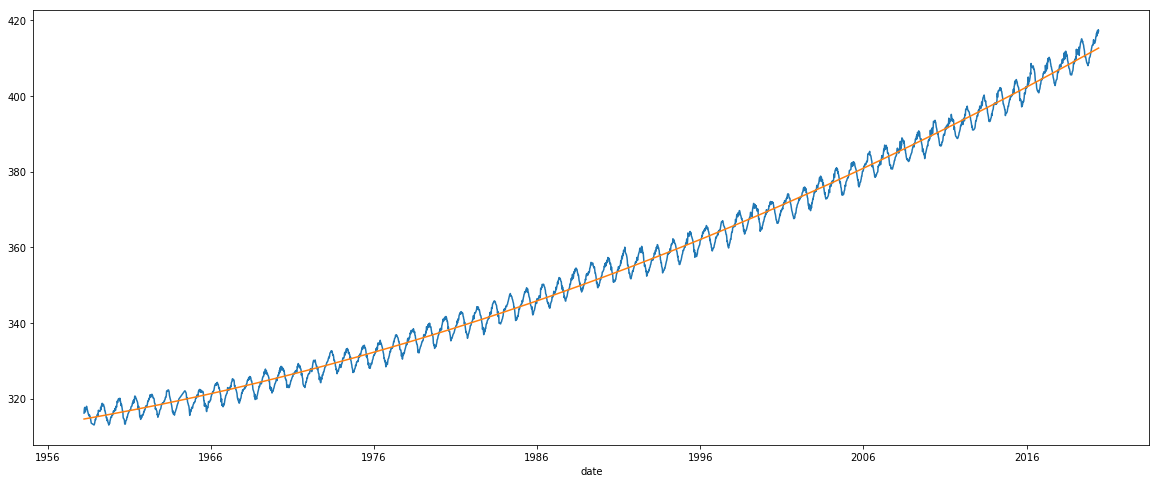

In [109]:
plt.figure(figsize=(20,8))
sorted_data['CO2'].plot()

predictions = pd.Series(reg.predict(X), sorted_data.index)
plt.plot(predictions)

On voit que le modèle capture bien la tendance haussière de la concentration observée ! 

Nous pouvons donc faire confiance à ce modèle pour estimer la concentration en CO<sub>2</sub> pour les années futures avec une précision relativement bonne. Par exemple, au 1er janvier 2025, la concentration devrait être proche de:

In [110]:
reg.predict(transform_input([datetime.datetime.strptime('2025-01-01', '%Y-%m-%d').toordinal()]))[0]

423.89403068381216